In [1]:
## Replacing outliers

In [ ]:
import pandas as  pd
import numpy as np
from fancyimpute import IterativeImputer

In [27]:
import matplotlib.pyplot as plt

In [19]:
def identify_outliers(data, column):
    q1 = np.percentile(data[column],25)
    q3 = np.percentile(data[column],75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    for i in range(0,len(data)):
        if data.loc[i,column] < lower_bound or data.loc[i,column] > upper_bound:
            data.loc[i,column] = np.NAN
    return data
        

In [20]:
def replace_outliers(data,imputer):
    for d in data.columns:
        data = identify_outliers(data,d)
    data_imputed = imputer.fit_transform(data)
    data = pd.DataFrame(data_imputed,columns = data.columns)
    return data
        
    

In [21]:
def drop_outliers(data):
    for d in data.columns:
        data = identify_outliers(data,d)
    data = data.dropna()
    return data

In [22]:
imputer = IterativeImputer()

In [23]:
dataset = pd.read_csv('data_transformation_2.csv')

In [24]:
dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [25]:
for i in range(0,25):
    dataset = replace_outliers(dataset, imputer)
dataset = drop_outliers(dataset)

/home/nilton/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/nilton/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/nilton/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


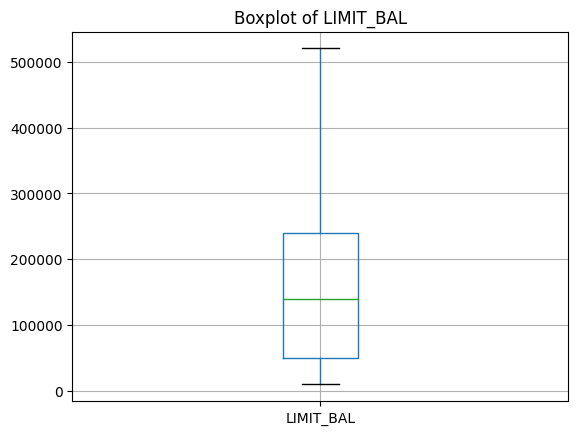

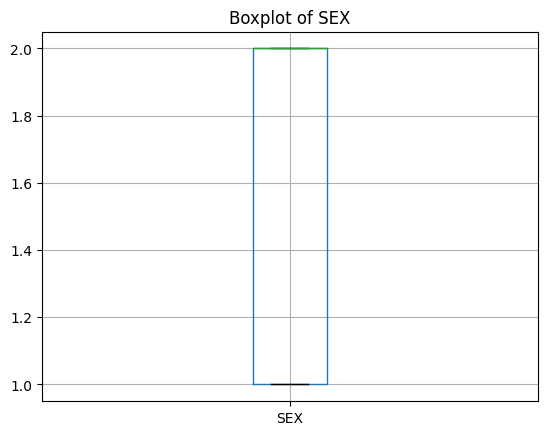

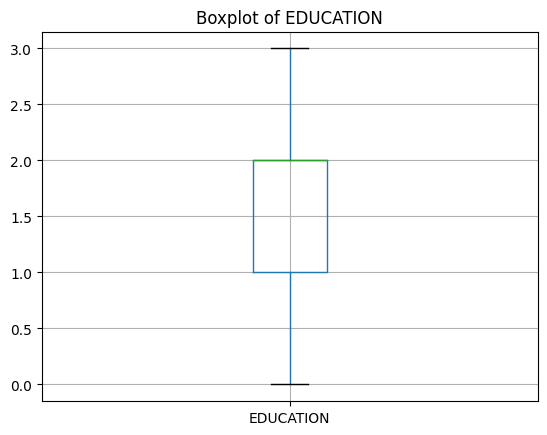

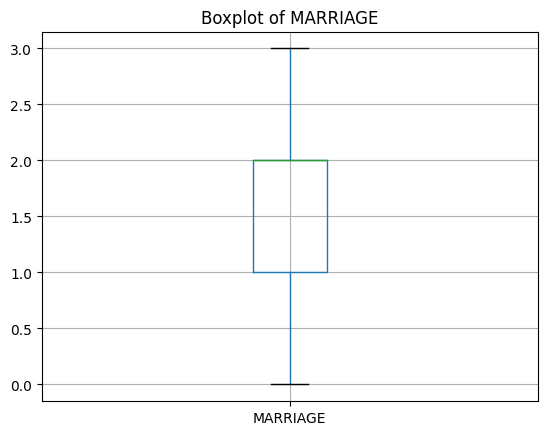

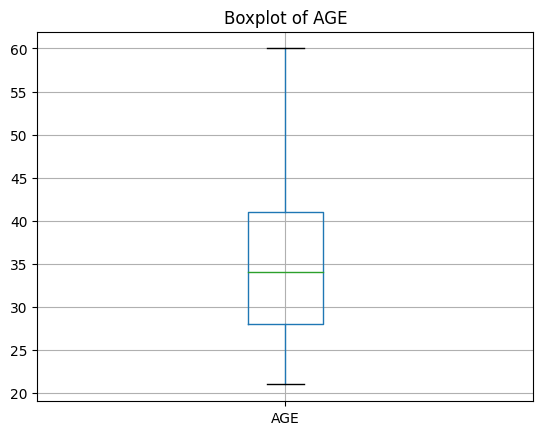

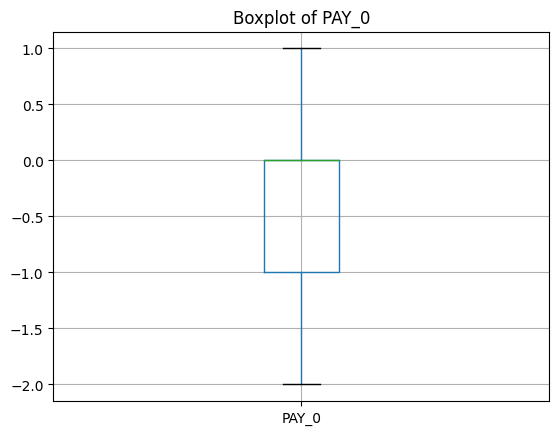

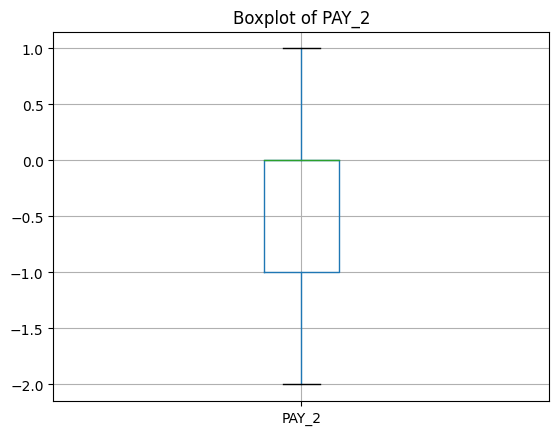

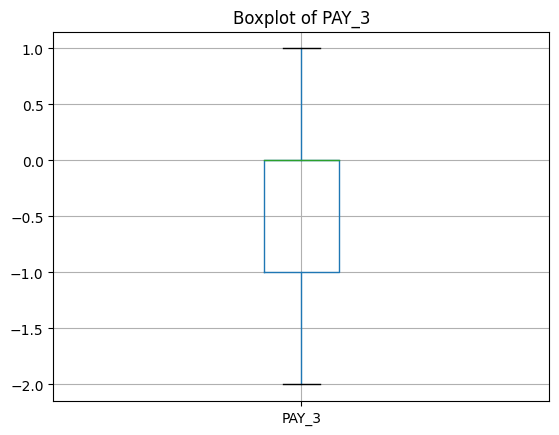

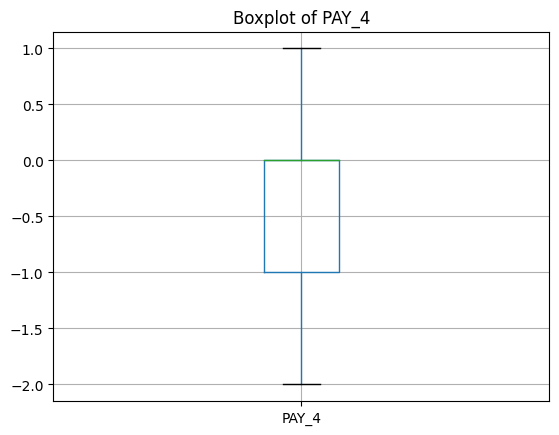

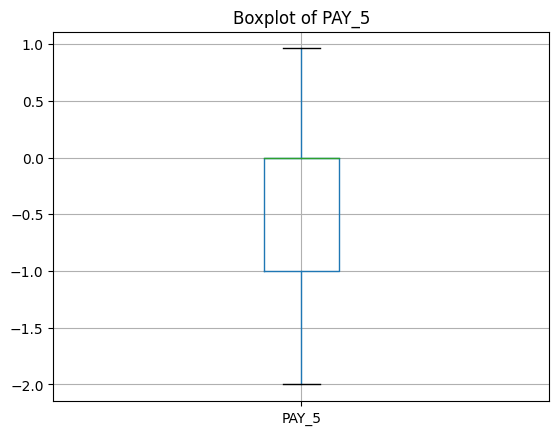

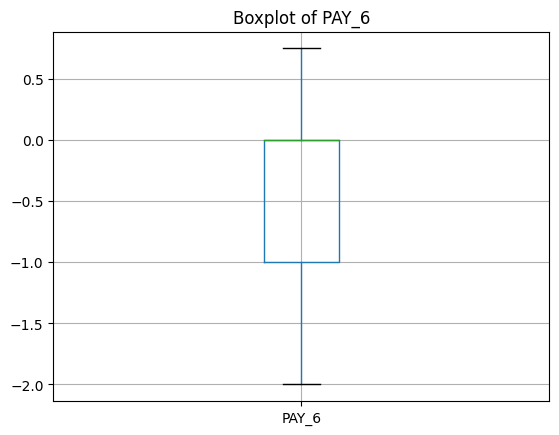

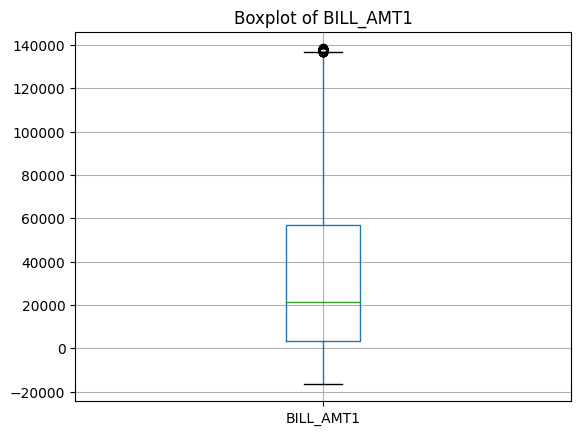

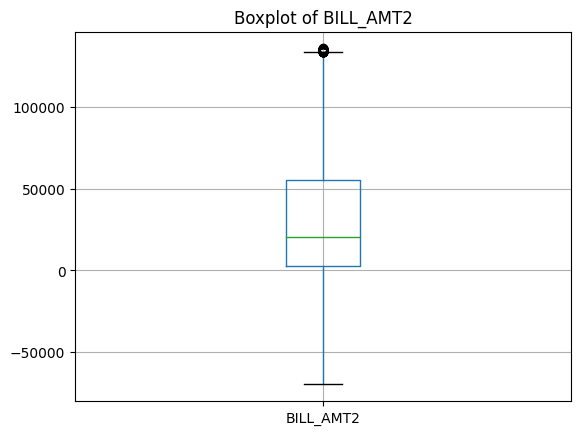

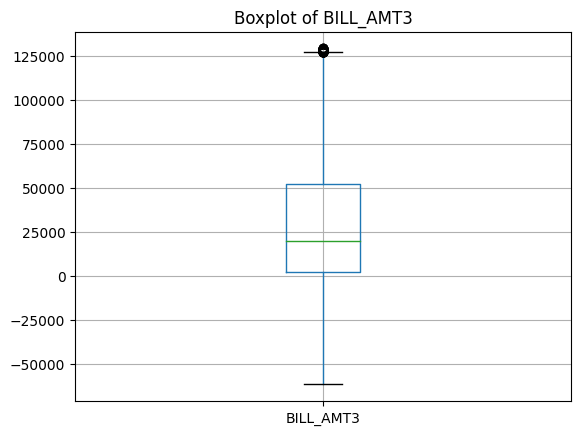

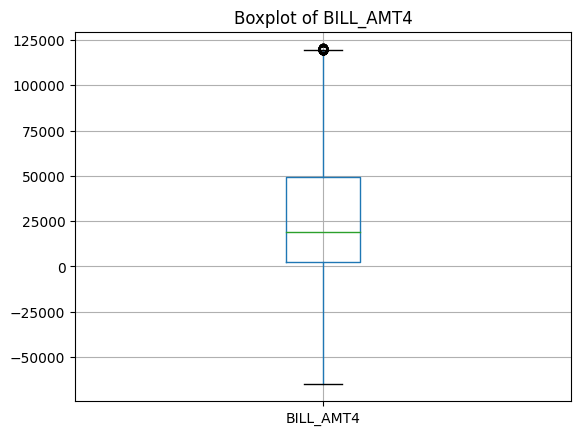

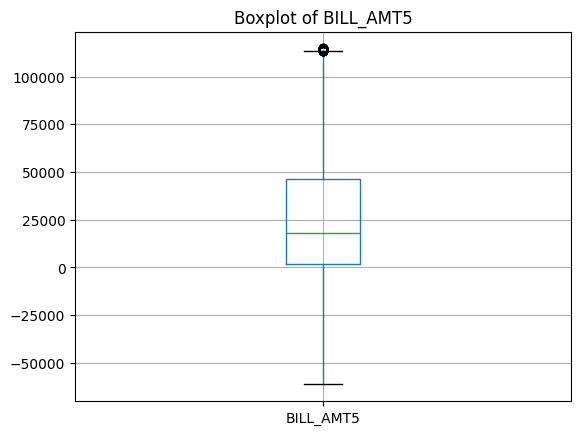

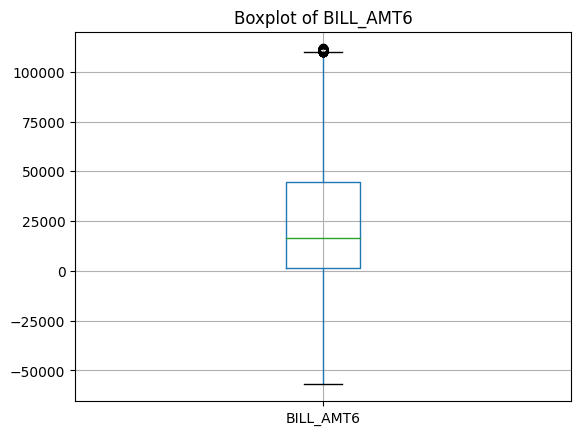

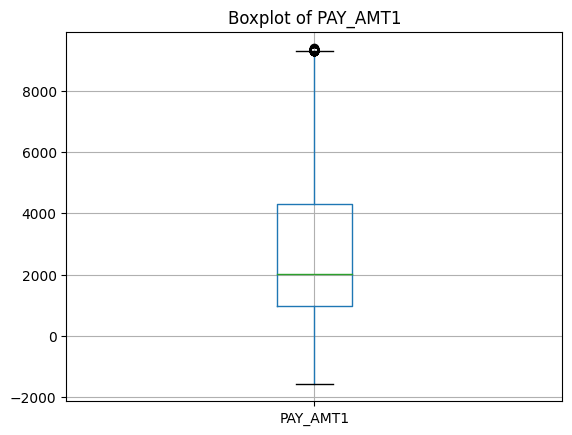

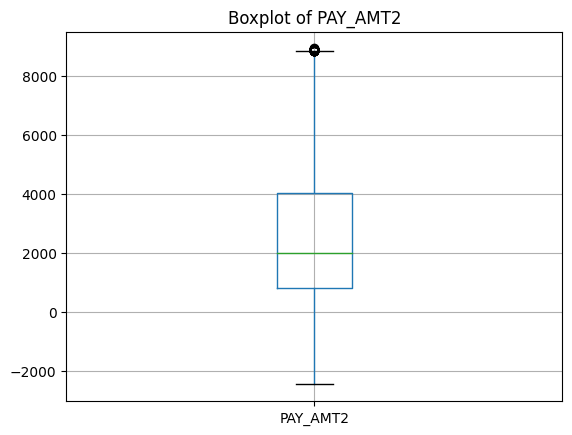

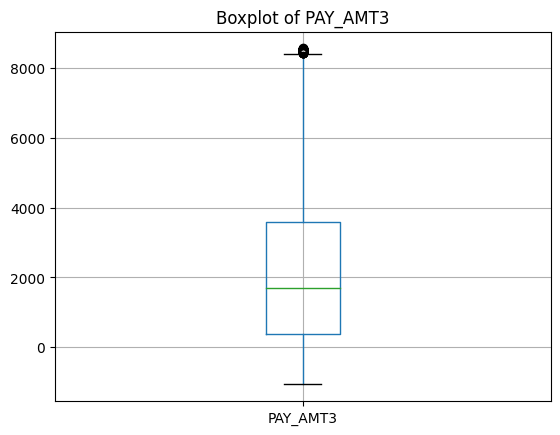

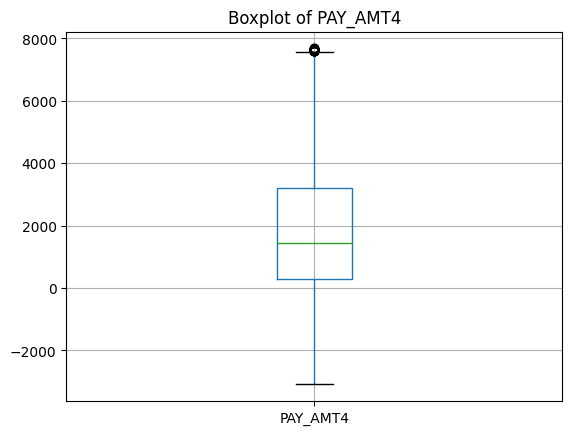

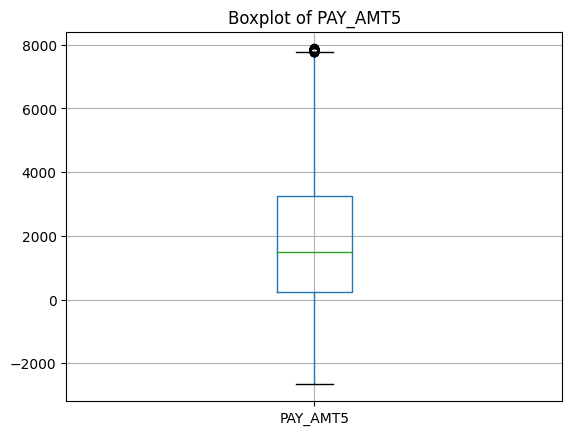

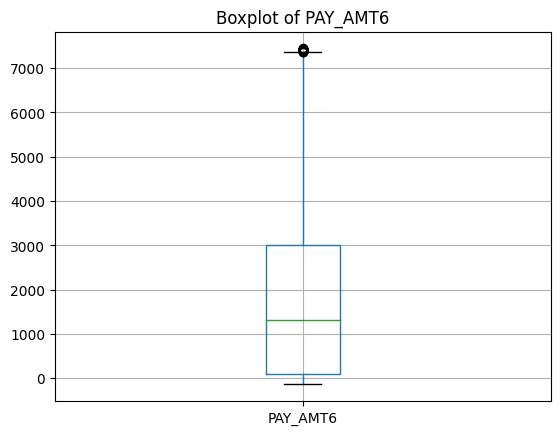

In [28]:
for column in dataset.columns[:-1]:
    plt.figure()
    dataset.boxplot([column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [31]:
dataset = dataset.astype("int")
dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,20000,2,2,1,24,0,0,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,0
1,120000,2,2,2,26,-1,0,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,6136,1723,1665,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,6517,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,1477,129,0,0,0
29997,30000,1,2,2,37,0,0,0,-1,0,...,20878,20582,19357,0,0,2384,4200,2000,3100,0
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,5810,3409,1178,1926,3657,1804,0


In [32]:
dataset.to_csv("data_transformation_3.csv", index = False)